# Narongkrit Khieopraphatsorn ID: 3975261346

# HW6_INF 552

### 1. Supervised, Semi-Supervised, and Unsupervised Learning
### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
### https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes. Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

#### Assume B is a positive class and M is a negative class

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from collections import defaultdict
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.model_selection import KFold
import random

%matplotlib inline

In [3]:
filename = "https://raw.githubusercontent.com/Tony-nkt/inf_552/master/wdbc.csv"

In [4]:
df = pd.read_csv(filename,header=None)

In [5]:
df.rename(columns={0:'ID',1:'class'}, inplace=True)

In [6]:
df = df.drop("ID",axis=1)

#### First 20% of positive and negative classes as the test set

In [7]:
df_test_01 = df[df['class'] == 'B'].iloc[0:71]

In [8]:
df_test_01 = df_test_01.append(df[df['class'] == 'M'].iloc[0:42])

In [9]:
df[df['class'] == 'B'].iloc[0:71].head()

,class,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [10]:
df[df['class'] == 'M'].iloc[0:42].head()

,class,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df_test_01.head()

,class,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


#### The rest is training set

In [12]:
df_train_01 = df[df['class'] == 'B'].iloc[71:]
df_train_01 = df_test_01.append(df[df['class'] == 'M'].iloc[42:])

In [13]:
df[df['class'] == 'B'].iloc[71:].head()

,class,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
154,B,13.15,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.034830,0.1822,...,14.77,20.50,97.67,677.3,0.14780,0.22560,0.30090,0.09722,0.3849,0.08633
155,B,12.25,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.023310,0.1970,...,13.59,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132
157,B,16.84,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.027710,0.1844,...,18.22,28.07,120.30,1032.0,0.08774,0.17100,0.18820,0.08436,0.2527,0.05972
158,B,12.06,12.74,76.84,448.6,0.09311,0.05241,0.01972,0.019630,0.1590,...,13.14,18.41,84.08,532.8,0.12750,0.12320,0.08636,0.07025,0.2514,0.07898
159,B,10.90,12.96,68.69,366.8,0.07515,0.03718,0.00309,0.006588,0.1442,...,12.36,18.20,78.07,470.0,0.11710,0.08294,0.01854,0.03953,0.2738,0.07685


In [14]:
df[df['class'] == 'M'].iloc[42:].head()

,class,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
47,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,...,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.3900,0.11790
53,M,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,...,20.60,24.13,135.1,1321.0,0.1280,0.2297,0.2623,0.1325,0.3021,0.07987
54,M,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,...,18.10,31.69,117.7,1030.0,0.1389,0.2057,0.2712,0.1530,0.2675,0.07873
56,M,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,...,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294
57,M,14.71,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,...,17.87,30.70,115.7,985.5,0.1368,0.4290,0.3587,0.1834,0.3698,0.10940


### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un-supervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F-score, and AUC) that you obtain from each algorithm.

In [15]:
supervised_learn_dict = defaultdict(list)
semi_supervised_learn_dict = defaultdict(list)
un_supervised_learn_dict = defaultdict(list)
spectral_clustering_dict = defaultdict(list)

In [57]:
warnings.filterwarnings('ignore')
df["class"].replace("B", 1,inplace=True)
df["class"].replace("M",0,inplace=True)
X = df.iloc[:,1:]
y = df["class"]
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df["class"],test_size=0.20,stratify=df["class"])
    [pred_01,acc_01,precision_01,recall_01,F_score_01, fpr_train_01, tpr_train_01, fpr_test_01, tpr_test_01, AUC_01] = supervised_learn(X_train,X_test,y_train,y_test)
    supervised_learn_dict["pred"].append(pred_01)
    supervised_learn_dict["acc"].append(acc_01)
    supervised_learn_dict["precision"].append(precision_01)
    supervised_learn_dict["recall"].append(recall_01)
    supervised_learn_dict["F_score"].append(F_score_01)
    supervised_learn_dict["AUC"].append(AUC_01)
    [pred_02,acc_02,precision_02,recall_02,F_score_02, fpr_train_02, tpr_train_02, fpr_test_02, tpr_test_02, AUC_02] = semi_supervised_learn(X_train,X_test,y_train,y_test)
    semi_supervised_learn_dict["pred"].append(pred_02)
    semi_supervised_learn_dict["acc"].append(acc_02)
    semi_supervised_learn_dict["precision"].append(precision_02)
    semi_supervised_learn_dict["recall"].append(recall_02)
    semi_supervised_learn_dict["F_score"].append(F_score_02)
    semi_supervised_learn_dict["AUC"].append(AUC_02)
    [pred_03,acc_03,precision_03,recall_03,F_score_03, fpr_train_03, tpr_train_03, fpr_test_03, tpr_test_03, AUC_03] = un_supervised_learn(X_train,X_test,y_train,y_test)
    un_supervised_learn_dict["pred"].append(pred_03)
    un_supervised_learn_dict["acc"].append(acc_03)
    un_supervised_learn_dict["precision"].append(precision_03)
    un_supervised_learn_dict["recall"].append(recall_03)
    un_supervised_learn_dict["F_score"].append(F_score_03)
    un_supervised_learn_dict["AUC"].append(AUC_03)
    [pred_04,acc_04,precision_04,recall_04,F_score_04, fpr_train_04, tpr_train_04, fpr_test_04, tpr_test_04, AUC_04] = spectral_clustering(X_train,X_test,y_train,y_test)
    spectral_clustering_dict["pred"].append(pred_04)
    spectral_clustering_dict["acc"].append(acc_04)
    spectral_clustering_dict["precision"].append(precision_04)
    spectral_clustering_dict["recall"].append(recall_04)
    spectral_clustering_dict["F_score"].append(F_score_04)
    spectral_clustering_dict["AUC"].append(AUC_04)
    print(_+1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [63]:
def combine_to_dataFrame_train(tmp_dict,tmp_avg):
    train = []
    for var in tmp_dict[tmp_avg]:
        train.append(var["train"])
    return train

In [64]:
def combine_to_dataFrame_test(tmp_dict,tmp_avg):
    test = []
    for var in tmp_dict[tmp_avg]:
        test.append(var["test"])
    return test

#### Supervised learning average scores (accuracy, precision, recall, F-score, and AUC)

In [86]:
supervised_learn_train_df = {}
supervised_learn_train_df["acc"] = combine_to_dataFrame_train(supervised_learn_dict,"acc")
supervised_learn_train_df["precision"] = combine_to_dataFrame_train(supervised_learn_dict,"precision")
supervised_learn_train_df["recall"] = combine_to_dataFrame_train(supervised_learn_dict,"recall")
supervised_learn_train_df["F_score"] = combine_to_dataFrame_train(supervised_learn_dict,"F_score")
supervised_learn_train_df["AUC"] = combine_to_dataFrame_train(supervised_learn_dict,"AUC")

In [87]:
supervised_learn_test_df = {}
supervised_learn_test_df["acc"] = combine_to_dataFrame_test(supervised_learn_dict,"acc")
supervised_learn_test_df["precision"] = combine_to_dataFrame_test(supervised_learn_dict,"precision")
supervised_learn_test_df["recall"] = combine_to_dataFrame_test(supervised_learn_dict,"recall")
supervised_learn_test_df["F_score"] = combine_to_dataFrame_test(supervised_learn_dict,"F_score")
supervised_learn_test_df["AUC"] = combine_to_dataFrame_test(supervised_learn_dict,"AUC")

In [88]:
real_supervised_learn_test_df = pd.DataFrame(supervised_learn_test_df).tail(30).reset_index().drop("index",axis = 1)
real_supervised_learn_train_df = pd.DataFrame(supervised_learn_train_df).tail(30).reset_index().drop("index",axis = 1)

In [99]:
mean_real_supervised_learn_train = pd.DataFrame({"accuracy":[real_supervised_learn_train_df["acc"].mean()],
                                                "precision":[real_supervised_learn_train_df["precision"].mean()],
                                                "recall":[real_supervised_learn_train_df["recall"].mean()],
                                                "F_score":[real_supervised_learn_train_df["F_score"].mean()],
                                                "AUC":[real_supervised_learn_train_df["AUC"].mean()]})
mean_real_supervised_learn_train.index = ["value"]

In [101]:
mean_real_supervised_learn_test = pd.DataFrame({"accuracy":[real_supervised_learn_test_df["acc"].mean()],
                                                "precision":[real_supervised_learn_test_df["precision"].mean()],
                                                "recall":[real_supervised_learn_test_df["recall"].mean()],
                                                "F_score":[real_supervised_learn_test_df["F_score"].mean()],
                                                "AUC":[real_supervised_learn_test_df["AUC"].mean()]})
mean_real_supervised_learn_test.index = ["value"]

In [100]:
mean_real_supervised_learn_train

,accuracy,precision,recall,F_score,AUC
value,0.984176,0.980325,0.994737,0.987467,0.997518


In [102]:
mean_real_supervised_learn_test

,accuracy,precision,recall,F_score,AUC
value,0.912573,0.987843,0.873611,0.924142,0.993463


#### semi_supervised_learning average scores (accuracy, precision, recall, F-score, and AUC)

In [128]:
def combine_to_dataFrame_train(tmp_dict,tmp_avg):
    train = []
    for var in tmp_dict[tmp_avg]:
        train += var["train"]
    return train

def combine_to_dataFrame_test(tmp_dict,tmp_avg):
    test = []
    for var in tmp_dict[tmp_avg]:
        test += var["test"]
    return test

In [129]:
semi_supervised_learn_train_df = {}
semi_supervised_learn_train_df["acc"] = combine_to_dataFrame_train(semi_supervised_learn_dict,"acc")
semi_supervised_learn_train_df["precision"] = combine_to_dataFrame_train(semi_supervised_learn_dict,"precision")
semi_supervised_learn_train_df["recall"] = combine_to_dataFrame_train(semi_supervised_learn_dict,"recall")
semi_supervised_learn_train_df["F_score"] = combine_to_dataFrame_train(semi_supervised_learn_dict,"F_score")
semi_supervised_learn_train_df["AUC"] = combine_to_dataFrame_train(semi_supervised_learn_dict,"AUC")

In [130]:
semi_supervised_learn_test_df = {}
semi_supervised_learn_test_df["acc"] = combine_to_dataFrame_test(semi_supervised_learn_dict,"acc")
semi_supervised_learn_test_df["precision"] = combine_to_dataFrame_test(semi_supervised_learn_dict,"precision")
semi_supervised_learn_test_df["recall"] = combine_to_dataFrame_test(semi_supervised_learn_dict,"recall")
semi_supervised_learn_test_df["F_score"] = combine_to_dataFrame_test(semi_supervised_learn_dict,"F_score")
semi_supervised_learn_test_df["AUC"] = combine_to_dataFrame_test(semi_supervised_learn_dict,"AUC")

In [131]:
real_semi_supervised_learn_test_df = pd.DataFrame(semi_supervised_learn_test_df).tail(30).reset_index().drop("index",axis = 1)
real_semi_supervised_learn_train_df = pd.DataFrame(semi_supervised_learn_train_df).tail(30).reset_index().drop("index",axis = 1)

In [132]:
mean_real_semi_supervised_learn_train = pd.DataFrame({"accuracy":[real_semi_supervised_learn_train_df["acc"].mean()],
                                                "precision":[real_semi_supervised_learn_train_df["precision"].mean()],
                                                "recall":[real_semi_supervised_learn_train_df["recall"].mean()],
                                                "F_score":[real_semi_supervised_learn_train_df["F_score"].mean()],
                                                "AUC":[real_semi_supervised_learn_train_df["AUC"].mean()]})
mean_real_semi_supervised_learn_train.index = ["value"]

In [133]:
mean_real_semi_supervised_learn_test = pd.DataFrame({"accuracy":[real_semi_supervised_learn_test_df["acc"].mean()],
                                                "precision":[real_semi_supervised_learn_test_df["precision"].mean()],
                                                "recall":[real_semi_supervised_learn_test_df["recall"].mean()],
                                                "F_score":[real_semi_supervised_learn_test_df["F_score"].mean()],
                                                "AUC":[real_semi_supervised_learn_test_df["AUC"].mean()]})
mean_real_semi_supervised_learn_test.index = ["value"]

In [134]:
mean_real_semi_supervised_learn_train

,accuracy,precision,recall,F_score,AUC
value,0.975018,0.969208,0.991813,0.980315,0.993668


In [135]:
mean_real_semi_supervised_learn_test

,accuracy,precision,recall,F_score,AUC
value,0.907018,0.983052,0.869444,0.918094,0.99019


#### un_supervised_learning average scores (accuracy, precision, recall, F-score, and AUC)

In [137]:
def combine_to_dataFrame_train(tmp_dict,tmp_avg):
    train = []
    for var in tmp_dict[tmp_avg]:
        train += var["train"]
    return train

def combine_to_dataFrame_test(tmp_dict,tmp_avg):
    test = []
    for var in tmp_dict[tmp_avg]:
        test += var["test"]
    return test

In [138]:
un_supervised_learn_train_df = {}
un_supervised_learn_train_df["acc"] = combine_to_dataFrame_train(un_supervised_learn_dict,"acc")
un_supervised_learn_train_df["precision"] = combine_to_dataFrame_train(un_supervised_learn_dict,"precision")
un_supervised_learn_train_df["recall"] = combine_to_dataFrame_train(un_supervised_learn_dict,"recall")
un_supervised_learn_train_df["F_score"] = combine_to_dataFrame_train(un_supervised_learn_dict,"F_score")
un_supervised_learn_train_df["AUC"] = combine_to_dataFrame_train(un_supervised_learn_dict,"AUC")

In [139]:
un_supervised_learn_test_df = {}
un_supervised_learn_test_df["acc"] = combine_to_dataFrame_test(un_supervised_learn_dict,"acc")
un_supervised_learn_test_df["precision"] = combine_to_dataFrame_test(un_supervised_learn_dict,"precision")
un_supervised_learn_test_df["recall"] = combine_to_dataFrame_test(un_supervised_learn_dict,"recall")
un_supervised_learn_test_df["F_score"] = combine_to_dataFrame_test(un_supervised_learn_dict,"F_score")
un_supervised_learn_test_df["AUC"] = combine_to_dataFrame_test(un_supervised_learn_dict,"AUC")

In [140]:
real_un_supervised_learn_test_df = pd.DataFrame(un_supervised_learn_test_df).tail(30).reset_index().drop("index",axis = 1)
real_un_supervised_learn_train_df = pd.DataFrame(un_supervised_learn_train_df).tail(30).reset_index().drop("index",axis = 1)

In [141]:
mean_real_un_supervised_learn_train = pd.DataFrame({"accuracy":[real_un_supervised_learn_train_df["acc"].mean()],
                                                "precision":[real_un_supervised_learn_train_df["precision"].mean()],
                                                "recall":[real_un_supervised_learn_train_df["recall"].mean()],
                                                "F_score":[real_un_supervised_learn_train_df["F_score"].mean()],
                                                "AUC":[real_un_supervised_learn_train_df["AUC"].mean()]})
mean_real_un_supervised_learn_train.index = ["value"]

In [142]:
mean_real_un_supervised_learn_test = pd.DataFrame({"accuracy":[real_un_supervised_learn_test_df["acc"].mean()],
                                                "precision":[real_un_supervised_learn_test_df["precision"].mean()],
                                                "recall":[real_un_supervised_learn_test_df["recall"].mean()],
                                                "F_score":[real_un_supervised_learn_test_df["F_score"].mean()],
                                                "AUC":[real_un_supervised_learn_test_df["AUC"].mean()]})
mean_real_un_supervised_learn_test.index = ["value"]

In [143]:
mean_real_un_supervised_learn_train

,accuracy,precision,recall,F_score,AUC
value,0.594212,0.56913,0.86655,0.685025,0.810485


In [144]:
mean_real_un_supervised_learn_test

,accuracy,precision,recall,F_score,AUC
value,0.594737,0.571218,0.86713,0.686989,0.806504


#### spectral_clustering average scores (accuracy, precision, recall, F-score, and AUC)

In [145]:
def combine_to_dataFrame_train(tmp_dict,tmp_avg):
    train = []
    for var in tmp_dict[tmp_avg]:
        train += var["train"]
    return train

def combine_to_dataFrame_test(tmp_dict,tmp_avg):
    test = []
    for var in tmp_dict[tmp_avg]:
        test += var["test"]
    return test

In [146]:
spectral_clustering_train_df = {}
spectral_clustering_train_df["acc"] = combine_to_dataFrame_train(spectral_clustering_dict,"acc")
spectral_clustering_train_df["precision"] = combine_to_dataFrame_train(spectral_clustering_dict,"precision")
spectral_clustering_train_df["recall"] = combine_to_dataFrame_train(spectral_clustering_dict,"recall")
spectral_clustering_train_df["F_score"] = combine_to_dataFrame_train(spectral_clustering_dict,"F_score")
spectral_clustering_train_df["AUC"] = combine_to_dataFrame_train(spectral_clustering_dict,"AUC")

In [147]:
spectral_clustering_test_df = {}
spectral_clustering_test_df["acc"] = combine_to_dataFrame_test(spectral_clustering_dict,"acc")
spectral_clustering_test_df["precision"] = combine_to_dataFrame_test(spectral_clustering_dict,"precision")
spectral_clustering_test_df["recall"] = combine_to_dataFrame_test(spectral_clustering_dict,"recall")
spectral_clustering_test_df["F_score"] = combine_to_dataFrame_test(spectral_clustering_dict,"F_score")
spectral_clustering_test_df["AUC"] = combine_to_dataFrame_test(spectral_clustering_dict,"AUC")

In [148]:
real_spectral_clustering_test_df = pd.DataFrame(spectral_clustering_test_df).tail(30).reset_index().drop("index",axis = 1)
real_spectral_clustering_train_df = pd.DataFrame(spectral_clustering_train_df).tail(30).reset_index().drop("index",axis = 1)

In [149]:
mean_real_spectral_clustering_train = pd.DataFrame({"accuracy":[real_spectral_clustering_train_df["acc"].mean()],
                                                "precision":[real_spectral_clustering_train_df["precision"].mean()],
                                                "recall":[real_spectral_clustering_train_df["recall"].mean()],
                                                "F_score":[real_spectral_clustering_train_df["F_score"].mean()],
                                                "AUC":[real_spectral_clustering_train_df["AUC"].mean()]})
mean_real_spectral_clustering_train.index = ["value"]

In [150]:
mean_real_spectral_clustering_test = pd.DataFrame({"accuracy":[real_spectral_clustering_test_df["acc"].mean()],
                                                "precision":[real_spectral_clustering_test_df["precision"].mean()],
                                                "recall":[real_spectral_clustering_test_df["recall"].mean()],
                                                "F_score":[real_spectral_clustering_test_df["F_score"].mean()],
                                                "AUC":[real_spectral_clustering_test_df["AUC"].mean()]})
mean_real_spectral_clustering_test.index = ["value"]

In [151]:
mean_real_spectral_clustering_train

,accuracy,precision,recall,F_score,AUC
value,0.857436,0.818424,0.993567,0.897388,0.167218


In [152]:
mean_real_spectral_clustering_test

,accuracy,precision,recall,F_score,AUC
value,0.822807,0.790417,0.992593,0.878133,0.161596


### i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

##### Assume B is a positive class and M is a negative class

In [53]:
def supervised_learn(X_train,X_test,y_train,y_test):
    norm_X_train = MinMaxScaler().fit_transform(X_train)
    norm_X_test = MinMaxScaler().fit_transform(X_test)
    l1_model_SVC = LinearSVC(loss='l2', penalty='l1', dual=False)
    penalty_SVC = []
    for i in range(-3,7):
        penalty_SVC.append(10**i)
    l1_param_grid = {'C': penalty_SVC}
    l1_gridCV = GridSearchCV(l1_model_SVC,scoring='accuracy',param_grid=l1_param_grid,refit=True,cv=5)
    l1_gridCV.fit(norm_X_train,y_train)
    l1_gridCV.best_params_
    pred_01 = {"train":l1_gridCV.predict(norm_X_train),"test":l1_gridCV.predict(norm_X_test)}
    acc_01 = {"train": accuracy_score(y_train,pred_01["train"]),"test": accuracy_score(y_test,pred_01["test"])}
    precision_01 = {"train":precision_score(y_train,pred_01["train"]),"test":precision_score(y_test,pred_01["test"])}
    recall_01 = {"train":recall_score(y_train,pred_01["train"]),"test":recall_score(y_test,pred_01["test"])}
    F_score_01 = {"train":f1_score(y_train,pred_01["train"]),"test":f1_score(y_test,pred_01["test"])}
    fpr_train_01, tpr_train_01, thresholds_train_01 = roc_curve(y_train,l1_gridCV.decision_function(norm_X_train))
    fpr_test_01, tpr_test_01, thresholds_test_01 = roc_curve(y_test,l1_gridCV.decision_function(norm_X_test))
    AUC_01 = {"train":auc(fpr_train_01, tpr_train_01),"test":auc(fpr_test_01, tpr_test_01)}
    return pred_01,acc_01,precision_01,recall_01,F_score_01, fpr_train_01, tpr_train_01, fpr_test_01, tpr_test_01, AUC_01

#### ROC curve for train data

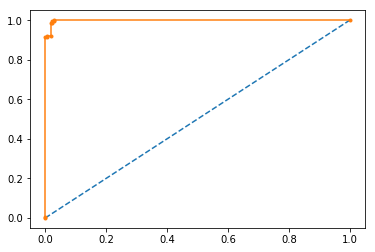

In [153]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_01, tpr_train_01, marker='.')
plt.show()

#### ROC curve for test data

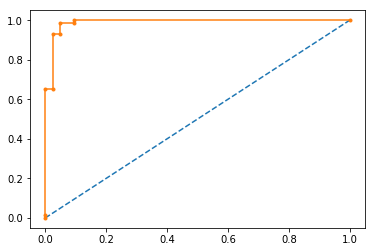

In [154]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_test_01, tpr_test_01, marker='.')
plt.show()

#### Confusion matrix for train data

In [400]:
confusion_matrix(y_train,supervised_learn_dict["pred"][-1]["train"]))

array([[163,   7],
       [  2, 283]])

##### True Positive = 283, True Negative 163, False Postive = 7, False Negative = 2

#### Confusion matrix for test data

In [230]:
confusion_matrix(y_test,supervised_learn_dict["pred"][-1]["test"]))

array([[42,  0],
       [ 5, 67]])

##### True Positive = 67, True Negative 42, False Postive = 0, False Negative = 5

### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.
### A. Train an L1-penalized SVM to classify the labeled data. Use normalized data. Choose the penalty parameter using 5 fold cross validation.

### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [54]:
def semi_supervised_learn(X_train,X_test,y_train,y_test):
    norm_X_train = MinMaxScaler().fit_transform(X_train)
    norm_X_test = MinMaxScaler().fit_transform(X_test)
    X_label_train, X_unlabel_train, y_label_train, y_unlabel_train = train_test_split(norm_X_train,y_train,test_size=0.50,stratify=y_train)
    l1_model_SVC = LinearSVC(loss='l2', penalty='l1', dual=False)
    penalty_SVC = []
    for i in range(-3,7):
        penalty_SVC.append(10**i)
    l1_param_grid = {'C': penalty_SVC}
    l1_gridCV = GridSearchCV(l1_model_SVC,scoring='accuracy',param_grid=l1_param_grid,refit=True,cv=5)
    l1_gridCV.fit(X_label_train,y_label_train)
    l1_model_SVC.C = l1_gridCV.best_params_['C']
    for _ in range(X_unlabel_train.shape[0]):
        y = l1_gridCV.decision_function(X_unlabel_train)
        dist = y
        dist = np.fabs(dist)
        max_index = list(dist).index(max(dist))
        y_label_train = np.array(y_label_train)
        y_unlabel_train = np.array(y_unlabel_train)
        tmp_pred = l1_gridCV.predict([X_unlabel_train[max_index]])
        y_label_train = np.append(y_label_train, tmp_pred, axis=0)
        X_label_train = np.append(X_label_train, [X_unlabel_train[max_index]], axis=0)
        X_unlabel_train = np.delete(X_unlabel_train,[max_index],axis=0)
        y_unlabel_train = np.delete(y_unlabel_train,[max_index],axis=0)
        l1_gridCV.fit(X_label_train,y_label_train)
    pred_02 = defaultdict(list)
    acc_02 = defaultdict(list)
    precision_02 = defaultdict(list)
    recall_02 = defaultdict(list)
    F_score_02 = defaultdict(list)
    AUC_02 = defaultdict(list)
    pred_02 = defaultdict(list)
    acc_02 = defaultdict(list)
    precision_02 = defaultdict(list)
    recall_02 = defaultdict(list)
    F_score_02 = defaultdict(list)
    AUC_02 = defaultdict(list)
    pred_02_train = l1_gridCV.predict(norm_X_train)
    pred_02_test = l1_gridCV.predict(norm_X_test)
    pred_02["train"].append(pred_02_train)
    pred_02["test"].append(pred_02_test)
    acc_02["train"].append(accuracy_score(y_train,pred_02_train))
    acc_02["test"].append(accuracy_score(y_test,pred_02_test))
    precision_02["train"].append(precision_score(y_train,pred_02_train))
    precision_02["test"].append(precision_score(y_test,pred_02_test))
    recall_02["train"].append(recall_score(y_train,pred_02_train))
    recall_02["test"].append(recall_score(y_test,pred_02_test))
    F_score_02["train"].append(f1_score(y_train,pred_02_train))
    F_score_02["test"].append(f1_score(y_test,pred_02_test))
    fpr_train_02, tpr_train_02, thresholds_train_02 = roc_curve(y_train,l1_gridCV.decision_function(norm_X_train))
    fpr_test_02, tpr_test_02, thresholds_test_02 = roc_curve(y_test,l1_gridCV.decision_function(norm_X_test))
    AUC_02["train"].append(auc(fpr_train_02, tpr_train_02))
    AUC_02["test"].append(auc(fpr_test_02, tpr_test_02))
    return pred_02,acc_02,precision_02,recall_02,F_score_02, fpr_train_02, tpr_train_02, fpr_test_02, tpr_test_02, AUC_02

#### ROC curve for train data

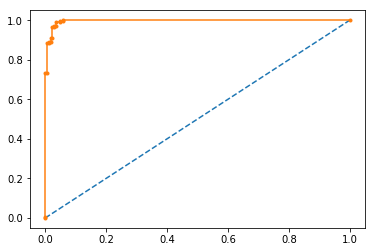

In [1034]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_02, tpr_train_02, marker='.')
plt.show()

#### ROC curve for test data

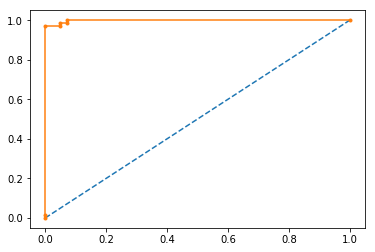

In [1035]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_test_02, tpr_test_02, marker='.')
plt.show()

#### Confusion matrix for train data

In [1036]:
confusion_matrix(y_train,semi_supervised_learn_dict["pred"][-1]["train"][0]))

array([[166,   4],
       [ 14, 271]])

##### True Positive = 271, True Negative 166, False Postive = 4, False Negative = 14

#### Confusion matrix for test data

In [1037]:
confusion_matrix(y_test,semi_supervised_learn_dict["pred"][-1]["test"][0]))

array([[42,  0],
       [ 6, 66]])

##### True Positive = 66 True Negative 42, False Positive = 0, False Negative = 6

### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

### A. Run the k-means algorithm multiple times. Make sure that you initialize the algorithm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

#### random the data before initializing the centroids.

### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

In [55]:
def un_supervised_learn(X_train,X_test,y_train,y_test):
    k_mean_cluster = KMeans(n_clusters=2,init="random",n_init=10)
    k_mean_cluster.fit(X_train)
    min_30 = defaultdict(list)
    for cluster in range(2):
        for i in range(X_train.shape[0]):
            dist_cl = ((np.array(X_train.iloc[i]) - k_mean_cluster.cluster_centers_[cluster])**2).sum()
            min_30[cluster].append(dist_cl)
    min_30_1 = pd.DataFrame(min_30[0])
    min_30_1.columns = ["Distance"]
    min_30_1_indexes = min_30_1.sort_values("Distance").head(30).index
    min_30_1 = min_30_1.loc[min_30_1_indexes]
    min_30_2 = pd.DataFrame(min_30[1])
    min_30_2.columns = ["Distance"]
    min_30_2_indexes = min_30_2.sort_values("Distance").head(30).index
    min_30_2 = min_30_2.loc[min_30_2_indexes]
    tmp_01 = pd.DataFrame()
    tmp_01["class"] = y_train 
    tmp_01["k_means_label"] = k_mean_cluster.labels_
    tmp_01.loc[tmp_01["k_means_label"] == 0, "pred_label" ] = y[min_30_1_indexes].value_counts().index[0]
    tmp_01.loc[tmp_01["k_means_label"] == 1, "pred_label" ] = y[min_30_2_indexes].value_counts().index[0]
    pred_03 = defaultdict(list)
    acc_03 = defaultdict(list)
    precision_03 = defaultdict(list)
    recall_03 = defaultdict(list)
    F_score_03 = defaultdict(list)
    AUC_03 = defaultdict(list)
    pred_03_train = tmp_01["pred_label"]
    pred_03["train"].append(pred_03_train)
    y_score_k_means_train = []
    for i in range(X_train.shape[0]):
        dist_cl_0 = ((np.array(X_train.iloc[i]) - k_mean_cluster.cluster_centers_[0]) ** 2).sum()
        dist_cl_1 = ((np.array(X_train.iloc[i]) - k_mean_cluster.cluster_centers_[1]) ** 2).sum()
        if dist_cl_0 < dist_cl_1:
            y_score_k_means_train.append(1 - (dist_cl_0/(dist_cl_0+dist_cl_1)))
        else:
            y_score_k_means_train.append(1 - (dist_cl_1/(dist_cl_0+dist_cl_1)))
    acc_03["train"].append(accuracy_score(y_train,pred_03_train))
    precision_03["train"].append(precision_score(y_train,pred_03_train))
    recall_03["train"].append(recall_score(y_train,pred_03_train))
    F_score_03["train"].append(f1_score(y_train,pred_03_train))
    fpr_train_03, tpr_train_03, thresholds_train_03 = roc_curve(y_train,y_score_k_means_train)
    AUC_03["train"].append(auc(fpr_train_03, tpr_train_03))
    y_test_pred = []
    y_score_k_means_test = []
    min_dist_test = defaultdict(list)
    for i in range(X_test.shape[0]):
        dist_cl_0 = ((np.array(X_test.iloc[i]) - k_mean_cluster.cluster_centers_[0]) ** 2).sum()
        dist_cl_1 = ((np.array(X_test.iloc[i]) - k_mean_cluster.cluster_centers_[1]) ** 2).sum()
        min_dist_test[0].append(dist_cl_0)
        min_dist_test[1].append(dist_cl_1)
        if dist_cl_0 < dist_cl_1:
            y_test_pred.append(y[min_30_1_indexes].value_counts().index[0])
            y_score_k_means_test.append(1 - (dist_cl_0/(dist_cl_0+dist_cl_1)))
        else:
            y_test_pred.append(y[min_30_2_indexes].value_counts().index[0])
            y_score_k_means_test.append(1 - (dist_cl_1/(dist_cl_0+dist_cl_1)))
    pred_03_test = y_test_pred
    pred_03["test"].append(pred_03_test)
    acc_03["test"].append(accuracy_score(y_test,pred_03_test))
    precision_03["test"].append(precision_score(y_test,pred_03_test))
    recall_03["test"].append(recall_score(y_test,pred_03_test))
    F_score_03["test"].append(f1_score(y_test,pred_03_test))
    fpr_test_03, tpr_test_03, thresholds_test_03 = roc_curve(y_test,y_score_k_means_test)
    AUC_03["test"].append(auc(fpr_test_03, tpr_test_03))
    return pred_03,acc_03,precision_03,recall_03,F_score_03, fpr_train_03, tpr_train_03, fpr_test_03, tpr_test_03, AUC_03 

#### ROC curve for train data

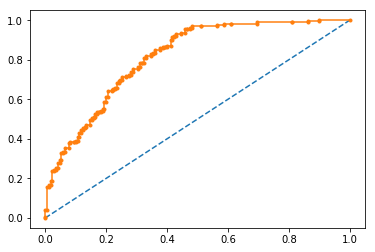

In [741]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_03, tpr_train_03, marker='.')
plt.show()

#### Confusion matrix for train data

In [726]:
confusion_matrix(y_train,un_supervised_learn_dict["pred"][-1]["train"][0]))

array([[  0, 170],
       [  0, 285]])

#### True Positive is 285, True Negative is 0, False Positive is 170, False Negative is 0

### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

#### ROC curve for test data

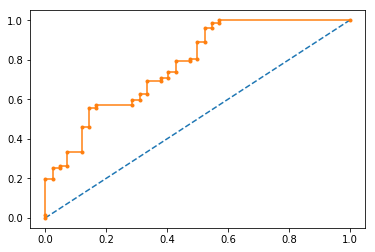

In [736]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_test_03, tpr_test_03, marker='.')
plt.show()

#### Confusion matrix for test data

In [737]:
confusion_matrix(y_test,un_supervised_learn_dict["pred"][-1]["test"][0]))

array([[ 0, 42],
       [ 0, 72]])

#### True Positive is 72, True Negative is 0, False Positive is 42, False Negative is 0

### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clusteres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.


In [56]:
def spectral_clustering(X_train,X_test,y_train,y_test):
    norm_X_train = MinMaxScaler().fit_transform(X_train)
    spectral_cluster = SpectralClustering(n_clusters=2, eigen_tol=1e-9 )
    
    pred_spectral_X = spectral_cluster.fit_predict(norm_X_train)
    total_dist = 0
    for row in spectral_cluster.affinity_matrix_:
        total_dist += sum(row)
    dist_row_01 = []
    for row in spectral_cluster.affinity_matrix_:
        dist_row_01.append(1 - (sum(row)/total_dist))
    tmp_train_04 = pd.DataFrame()
    tmp_train_04["class"] = y_train 
    tmp_train_04["spectral_cl_label"] = spectral_cluster.labels_
    for i in range(2):
        if len(tmp_train_04[tmp_train_04["spectral_cl_label"] == i]["class"].value_counts()) != 0:
            new_label = tmp_train_04[tmp_train_04["spectral_cl_label"] == i]["class"].value_counts().index[0]
            tmp_train_04.loc[tmp_train_04["spectral_cl_label"] == i, "pred_label" ] = new_label
    pred_04 = defaultdict(list)
    acc_04 = defaultdict(list)
    precision_04 = defaultdict(list)
    recall_04 = defaultdict(list)
    F_score_04 = defaultdict(list)
    AUC_04 = defaultdict(list)
    pred_04_train = tmp_train_04["pred_label"]
    pred_04["train"].append(pred_04_train)
    acc_04["train"].append(accuracy_score(y_train,pred_04_train))
    precision_04["train"].append(precision_score(y_train,pred_04_train))
    recall_04["train"].append(recall_score(y_train,pred_04_train))
    F_score_04["train"].append(f1_score(y_train,pred_04_train))
    fpr_train_04, tpr_train_04, thresholds_train_04 = roc_curve(y_train,dist_row_01)
    AUC_04["train"].append(auc(fpr_train_04, tpr_train_04))
    norm_X_test = MinMaxScaler().fit_transform(X_test)
    pred_spectral_X_test = spectral_cluster.fit_predict(norm_X_test)
    tmp_test_04 = pd.DataFrame()
    tmp_test_04["class"] = y_test 
    tmp_test_04["spectral_cl_label"] = pred_spectral_X_test
    for i in range(2):
        if len(tmp_test_04[tmp_test_04["spectral_cl_label"] == i]["class"].value_counts()) != 0:
            new_label = tmp_test_04[tmp_test_04["spectral_cl_label"] == i]["class"].value_counts().index[0]
            tmp_test_04.loc[tmp_test_04["spectral_cl_label"] == i, "pred_label" ] = new_label
    pred_04_test = tmp_test_04["pred_label"]    
    pred_04["test"].append(pred_04_test)
    acc_04["test"].append(accuracy_score(y_test,pred_04_test))
    precision_04["test"].append(precision_score(y_test,pred_04_test))
    recall_04["test"].append(recall_score(y_test,pred_04_test))
    F_score_04["test"].append(f1_score(y_test,pred_04_test))
    total_dist = 0
    for row in spectral_cluster.affinity_matrix_:
        total_dist += sum(row)
    dist_row_02 = []
    for row in spectral_cluster.affinity_matrix_:
        dist_row_02.append(1 - (sum(row)/total_dist))
    fpr_test_04, tpr_test_04, thresholds_test_04 = roc_curve(y_test, np.array(dist_row_02))
    AUC_04["test"].append(auc(fpr_test_04, tpr_test_04))
    return pred_04,acc_04,precision_04,recall_04,F_score_04, fpr_train_04, tpr_train_04, fpr_test_04, tpr_test_04, AUC_04 

#### ROC curve for train data

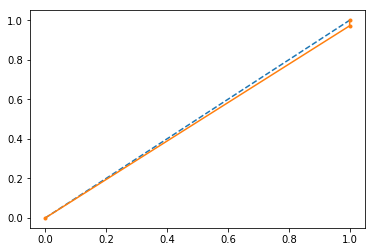

In [1259]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_04, tpr_train_04, marker='.')
plt.show()

#### Confusion matrix for train data

In [1257]:
confusion_matrix(y_train,spectral_clustering_dict["pred"][-1]["train"][0]))

array([[  0, 170],
       [  0, 285]])

#### True Positive is 285, True Negative is 0, False Positive is 170, False Negative is 0

#### ROC curve for test data

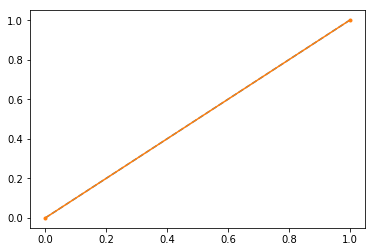

In [1266]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_test_04, tpr_test_04, marker='.')
plt.show()

#### Confusion matrix for test data

In [1268]:
confusion_matrix(y_test,semi_supervised_learn_dict["pred"][-1]["test"][0]))

array([[ 2, 40],
       [ 0, 72]])

#### True Positive is 72, True Negative is 2, False Positive is 40, False Negative is 0

### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

#### supervised_learn train and test data

In [169]:
real_supervised_learn_train_df.head()

,acc,precision,recall,F_score,AUC
0,0.991209,0.986159,1.000000,0.993031,0.999133
1,0.993407,0.989583,1.000000,0.994764,0.998204
2,0.982418,0.982578,0.989474,0.986014,0.997296
3,0.980220,0.982517,0.985965,0.984238,0.997131
4,0.986813,0.986063,0.992982,0.989510,0.999030


In [170]:
real_supervised_learn_test_df.head()

,acc,precision,recall,F_score,AUC
0,0.877193,1.000000,0.805556,0.892308,0.982143
1,0.894737,1.000000,0.833333,0.909091,0.997024
2,0.850877,1.000000,0.763889,0.866142,0.993717
3,0.885965,1.000000,0.819444,0.900763,0.990741
4,0.956140,0.935065,1.000000,0.966443,0.983796


#### semi_supervised_learn train and test data

In [171]:
real_semi_supervised_learn_train_df.head()

,acc,precision,recall,F_score,AUC
0,0.973626,0.959596,1.000000,0.979381,0.996347
1,0.978022,0.975779,0.989474,0.982578,0.995913
2,0.975824,0.969178,0.992982,0.980936,0.992012
3,0.980220,0.975862,0.992982,0.984348,0.990795
4,0.986813,0.982699,0.996491,0.989547,0.998576


In [172]:
real_semi_supervised_learn_test_df.head()

,acc,precision,recall,F_score,AUC
0,0.938596,0.971014,0.930556,0.950355,0.989749
1,0.929825,0.970588,0.916667,0.942857,0.989749
2,0.719298,0.976190,0.569444,0.719298,0.966601
3,0.833333,1.000000,0.736111,0.848000,0.984127
4,0.964912,0.947368,1.000000,0.972973,0.980820


#### un_supervised_learn train and test data

In [173]:
real_un_supervised_learn_train_df.head()

,acc,precision,recall,F_score,AUC
0,0.626374,0.626374,1.000000,0.770270,0.813127
1,0.147253,0.009524,0.003509,0.005128,0.808793
2,0.626374,0.626374,1.000000,0.770270,0.814262
3,0.167033,0.000000,0.000000,0.000000,0.809928
4,0.626374,0.626374,1.000000,0.770270,0.809370


In [174]:
real_un_supervised_learn_test_df.head()

,acc,precision,recall,F_score,AUC
0,0.631579,0.631579,1.000000,0.774194,0.830688
1,0.122807,0.000000,0.000000,0.000000,0.806878
2,0.631579,0.631579,1.000000,0.774194,0.741071
3,0.149123,0.037037,0.013889,0.020202,0.865410
4,0.631579,0.631579,1.000000,0.774194,0.764220


#### spectral_clustering train and test data

In [175]:
real_spectral_clustering_train_df.head()

,acc,precision,recall,F_score,AUC
0,0.863736,0.823188,0.996491,0.901587,0.163488
1,0.879121,0.842262,0.992982,0.911433,0.163550
2,0.890110,0.854985,0.992982,0.918831,0.173106
3,0.821978,0.780220,0.996491,0.875193,0.158390
4,0.854945,0.813754,0.996491,0.895899,0.171290


In [176]:
real_spectral_clustering_test_df.head()

,acc,precision,recall,F_score,AUC
0,0.807018,0.765957,1.000000,0.867470,0.153770
1,0.877193,0.837209,1.000000,0.911392,0.152116
2,0.728070,0.699029,1.000000,0.822857,0.139220
3,0.877193,0.837209,1.000000,0.911392,0.180556
4,0.903509,0.896104,0.958333,0.926174,0.168651


### 2. Active Learning Using Support Vector Machines
### (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.


In [20]:
fileName2 = 'https://raw.githubusercontent.com/Tony-nkt/inf_552/master/data_banknote_authentication.txt'

In [21]:
df_2 = pd.read_csv(fileName2,header=None)

In [22]:
df_2.rename(columns={4:'class'},inplace=True)

### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.
### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

#### Performing Normalize data for X_train_2,X_test_2 and X_pool_2

##### Fix error for CV-10, n=10 and class (makes sure that class has 2)

In [23]:
def passive_learn(df_train_2,X_test_2,y_test_2):
    penalty_SVC = []
    for i in range(-3,7):
        penalty_SVC.append(10**i)
    norm_X_test_2 = MinMaxScaler().fit_transform(X_test_2)
    test_error_1 = defaultdict(list)
    df_pool_2 = pd.DataFrame()
    for _ in range(90):
        tmp_df = df_train_2.sample(10)
        df_pool_2 = df_pool_2.append(tmp_df)
        df_train_2 = df_train_2.drop(tmp_df.index,axis=0)
        while len(df_pool_2["class"].value_counts()) < 2 or df_pool_2["class"].value_counts()[1] < 0.2 * (df_pool_2["class"].value_counts().values.sum()) or df_pool_2["class"].value_counts()[0] < 0.2 * (df_pool_2["class"].value_counts().values.sum()):
            df_pool_2 = df_pool_2.drop(tmp_df.index,axis=0)
            df_train_2 = df_train_2.append(tmp_df)
            tmp_df = df_train_2.sample(10)
            df_pool_2 = df_pool_2.append(tmp_df)
            df_train_2 = df_train_2.drop(tmp_df.index,axis=0) 
        X_pool_2 = df_pool_2.iloc[:,:-1]
        norm_X_pool_2 = MinMaxScaler().fit_transform(X_pool_2)
        y_pool_2 = df_pool_2["class"]
        X_train_2 = df_train_2.iloc[:,:-1]
        y_train_2 = df_train_2["class"]
        l1_model_SVC_2 = LinearSVC(loss='l2', penalty='l1', dual=False)
        l1_param_grid = {'C': penalty_SVC}
        l1_gridCV_2 = GridSearchCV(l1_model_SVC_2,scoring='accuracy',param_grid=l1_param_grid,refit=True,cv=KFold(10))
        l1_gridCV_2.fit(norm_X_pool_2,y_pool_2)
        pred_test = l1_gridCV_2.predict(norm_X_test_2)
        test_error_1["test error"].append(1-accuracy_score(y_test_2,pred_test))
    return test_error_1

### ii.) Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [52]:
def active_learn(df_train_2,X_test_2,y_test_2):
    penalty_SVC = []
    for i in range(-3,7):
        penalty_SVC.append(10**i)
    norm_X_test_2 = MinMaxScaler().fit_transform(X_test_2)
    test_error_2 = defaultdict(list)
    df_pool_2 = pd.DataFrame()
    tmp_df = df_train_2.sample(10)
    df_pool_2 = df_pool_2.append(tmp_df)
    df_train_2 = df_train_2.drop(tmp_df.index,axis=0)
    while len(df_pool_2["class"].value_counts()) < 2 or df_pool_2["class"].value_counts()[1] < 0.2 * (df_pool_2["class"].value_counts().values.sum()) or df_pool_2["class"].value_counts()[0] < 0.2 * (df_pool_2["class"].value_counts().values.sum()):
        df_pool_2 = df_pool_2.drop(tmp_df.index,axis=0)
        df_train_2 = df_train_2.append(tmp_df)
        tmp_df = df_train_2.sample(10)
        df_pool_2 = df_pool_2.append(tmp_df)
        df_train_2 = df_train_2.drop(tmp_df.index,axis=0) 
    X_pool_2 = df_pool_2.iloc[:,:-1]
    norm_X_pool_2 = MinMaxScaler().fit_transform(X_pool_2)
    y_pool_2 = df_pool_2["class"]
    X_train_2 = df_train_2.iloc[:,:-1]
    y_train_2 = df_train_2["class"]
    l1_model_SVC_2 = LinearSVC(loss='l2', penalty='l1', dual=False)
    
    
    
    l1_param_grid = {'C': penalty_SVC}
    l1_gridCV_2 = GridSearchCV(l1_model_SVC_2,scoring='accuracy',param_grid=l1_param_grid,refit=True,cv=KFold(10))
    l1_gridCV_2.fit(norm_X_pool_2,y_pool_2)
    test_error_2['C'].append(l1_gridCV_2.best_params_['C'])
    pred_test = l1_gridCV_2.predict(norm_X_test_2)
    test_error_2["test error"].append(1-accuracy_score(y_test_2,pred_test))
    y = l1_gridCV_2.decision_function(X_train_2)
    dist = y
    dist = np.fabs(dist)
    df_train_2["dist"] = dist
    for _ in range(89):
        min_10_indexes = df_train_2.sort_values("dist").iloc[:10].index
        tmp_df = df_train_2.drop("dist",axis=1).loc[min_10_indexes]
        df_pool_2 = df_pool_2.append(tmp_df)
        df_train_2.drop(tmp_df.index,axis=0)
        
        i = 1
        while len(df_pool_2["class"].value_counts()) < 2 or df_pool_2["class"].value_counts()[1] < 0.2 * (df_pool_2["class"].value_counts().values.sum()) or df_pool_2["class"].value_counts()[0] < 0.2 * (df_pool_2["class"].value_counts().values.sum()):
            df_pool_2 = df_pool_2.drop(tmp_df.index,axis=0)
            df_train_2 = df_train_2.append(tmp_df)
            min_10_indexes = df_train_2.sort_values("dist").iloc[i:10+i].index
            tmp_df = df_train_2.drop("dist",axis=1).loc[min_10_indexes]
            df_pool_2 = df_pool_2.append(tmp_df)
            df_train_2 = df_train_2.drop(tmp_df.index,axis=0) 
            i +=1

        X_pool_2 = df_pool_2.iloc[:,:-1]
        norm_X_pool_2 = MinMaxScaler().fit_transform(X_pool_2)
        y_pool_2 = df_pool_2["class"]
        X_train_2 = df_train_2.iloc[:,:-1]
        y_train_2 = df_train_2["class"]
        l1_model_SVC_2 = LinearSVC(loss='l2', penalty='l1', dual=False)
        l1_param_grid = {'C': penalty_SVC}
        l1_gridCV_2 = GridSearchCV(l1_model_SVC_2,scoring='accuracy',param_grid=l1_param_grid,refit=True,cv=KFold(10))
        l1_gridCV_2.fit(norm_X_pool_2,y_pool_2)
        pred_test = l1_gridCV_2.predict(norm_X_test_2)
        test_error_2["test error"].append(1-accuracy_score(y_test_2,pred_test))
    return test_error_2

### (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

In [25]:
all_test_error_01 = {}
all_test_error_02 = {}

In [177]:
for i in range(50):
    df_test_2 = df_2.sample(n=472, random_state = i+50)
    df_train_2 = df_2.drop(df_test_2.index,axis=0)
    X_train_2 = df_train_2.iloc[:,:-1]
    y_train_2 = df_train_2["class"]
    X_test_2 = df_test_2.iloc[:,:-1]
    y_test_2 = df_test_2["class"]
    all_test_error_01[i] = passive_learn(df_train_2,X_test_2,y_test_2)["test error"]
    all_test_error_02[i] = active_learn(df_train_2,X_test_2,y_test_2)["test error"]

In [225]:
all_test_error_01 = pd.DataFrame(all_test_error_01)


In [226]:
all_test_error_01['mean'] = all_test_error_01.mean(axis=1)


In [227]:
pas_mean = np.array(all_test_error_01['mean'])


In [254]:
all_test_error_02 = pd.DataFrame(all_test_error_02)


In [255]:
all_test_error_02['mean'] = all_test_error_02.mean(axis=1)


In [256]:
act_mean = np.array(all_test_error_02['mean'])


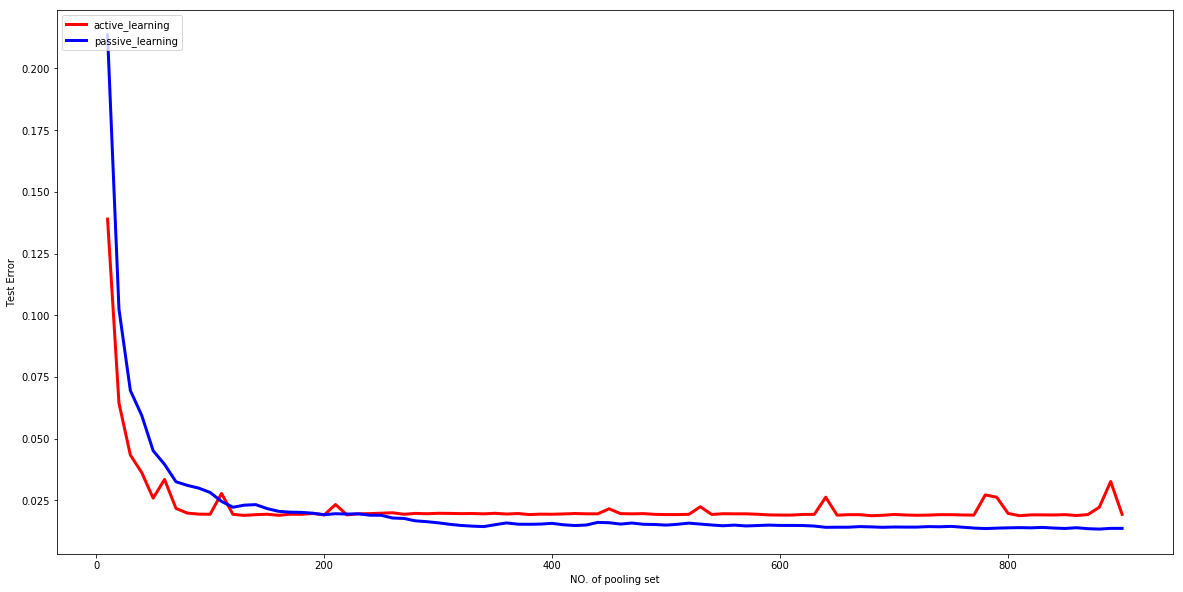

In [257]:
plt.figure(figsize=(20,10))
plt.plot(range(10,901,10), act_mean, color='red',linewidth=3,label="active_learning")
plt.plot(range(10,901,10), pas_mean, color='blue',linewidth=3,label="passive_learning")
plt.xlabel("NO. of pooling set")
plt.ylabel("Test Error")
plt.legend(loc=2)
plt.show()

### Conclusion

#### The blue line shows the passive learning curve, meanwhile the red line shows active learning curve. At first, the passive learning has more errors than active learning. However, when the number of pooling set is 220, the passive curve goes down and the active curve error is steady.

In [233]:
all_test_error_01 = pd.DataFrame(all_test_error_01)


In [234]:
all_test_error_02 = pd.DataFrame(all_test_error_02)


In [237]:
all_test_error_01.head()


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,mean
0,0.150424,0.491525,0.421610,0.459746,0.175847,0.451271,0.580508,0.415254,0.186441,0.423729,...,0.241525,0.061441,0.027542,0.213983,0.076271,0.345339,0.127119,0.152542,0.122881,0.213602
1,0.052966,0.457627,0.040254,0.086864,0.148305,0.165254,0.088983,0.230932,0.044492,0.052966,...,0.230932,0.091102,0.038136,0.294492,0.042373,0.067797,0.148305,0.025424,0.052966,0.102500
2,0.101695,0.105932,0.048729,0.069915,0.048729,0.114407,0.046610,0.055085,0.112288,0.052966,...,0.190678,0.105932,0.033898,0.110169,0.050847,0.031780,0.135593,0.103814,0.069915,0.069492
3,0.065678,0.072034,0.027542,0.101695,0.103814,0.165254,0.023305,0.093220,0.125000,0.095339,...,0.103814,0.108051,0.040254,0.044492,0.052966,0.036017,0.076271,0.023305,0.048729,0.059364
4,0.029661,0.040254,0.031780,0.021186,0.021186,0.069915,0.025424,0.091102,0.116525,0.016949,...,0.110169,0.042373,0.019068,0.029661,0.027542,0.040254,0.074153,0.052966,0.042373,0.045085


In [238]:
all_test_error_02.head()


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,mean
0,0.330508,0.144068,0.205508,0.152542,0.161017,0.379237,0.241525,0.173729,0.199153,0.201271,...,0.394068,0.317797,0.383475,0.146186,0.114407,0.173729,0.364407,0.171610,0.137712,0.228347
1,0.099576,0.074153,0.152542,0.048729,0.101695,0.182203,0.266949,0.091102,0.088983,0.192797,...,0.146186,0.127119,0.207627,0.021186,0.173729,0.103814,0.095339,0.029661,0.169492,0.126610
2,0.084746,0.080508,0.086864,0.093220,0.243644,0.188559,0.141949,0.097458,0.097458,0.192797,...,0.131356,0.127119,0.173729,0.016949,0.199153,0.105932,0.040254,0.050847,0.182203,0.124407
3,0.027542,0.084746,0.080508,0.059322,0.133475,0.141949,0.141949,0.105932,0.099576,0.186441,...,0.116525,0.129237,0.152542,0.016949,0.112288,0.114407,0.025424,0.052966,0.201271,0.123347
4,0.019068,0.086864,0.086864,0.052966,0.197034,0.139831,0.476695,0.105932,0.103814,0.186441,...,0.133475,0.129237,0.139831,0.019068,0.158898,0.122881,0.112288,0.059322,0.199153,0.127458
